In [26]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline

# Specify the file path of the log file
file_path = 'C:\\Users\\MD Arifuzzaman\\Documents\\Integrify_Assignment\\data_science_project\\access.log'

# Read the log file line by line
with open(file_path, 'r') as f:
    lines = f.readlines()

# Create a DataFrame from the list of lines
df = pd.DataFrame(lines, columns=['value'])
data = df
print(df.sample())

                                                     value
3763490  46.225.182.206 - - [23/Jan/2019:17:28:54 +0330...


- IP: IP address of the client that made the request
- Timestamp: date and time of the request in the format "DD/Mmm/YYYY:HH:MM:SS +/-HHMM"
- Method: HTTP method used in the request (e.g. GET, POST, etc.)
- Path: resource requested in the server (e.g. /index.html, /api/user/1, etc.)
- Protocol: HTTP protocol version used by the client (e.g. HTTP/1.1)
- Status Code: HTTP status code returned by the server (e.g. 200, 404, etc.)
- User Agent: User agent string sent by the client
- Content Size: Size of the response body in bytes
- Date: Extracted from the Timestamp column
- Time: Extracted from the Timestamp column

In [32]:
#Your existing code

df = df.sample(1000)

# Create a DataFrame from the data
#df = pd.DataFrame(data, columns=['value'])

# Extract the IP address
df['IP'] = df['value'].str.split(' - -').str[0]

# Extract the timestamp
timestamp_pattern = r'(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2} \+\d{4})'
df['Timestamp'] = df['value'].str.extract(timestamp_pattern, expand=False)

# Extract the date and time from the timestamp
df['Date'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z').dt.date
df['Time'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z').dt.time

# Extract the browser name from the user agent
df['Browser'] = df['value'].str.extract(r'"[^"]+"\s"([^"]+)"\s')

# Replace missing values with NaN
df['Browser'].fillna(value=pd.NA, inplace=True)

# Display the extracted data
#print(df['Browser'])

# Extract the HTTP method, path, and protocol
split_data = df['value'].str.extract(r'"(.*?)"', expand=False).str.split()
df['Method'] = split_data.str[0]
df['Path'] = split_data.str[1]
df['Protocol'] = split_data.str[2]

# Extract the status code
df['Status Code'] = df['value'].str.extract(r'" (\d{3})', expand=False)

# Extract the user agent
df['User Agent'] = df['value'].str.extract(r'"(.+?)" "-"', expand=False)

# Extract the content size
content_size_pattern = r'\b(?:200|400|404|500|600)\s(\d+)\s'
df['Content Size'] = df['value'].str.extract(content_size_pattern, expand=False)

# Display the extracted data
print(df[['IP', 'Timestamp', 'Method', 'Path', 'Protocol', 'Status Code', 'User Agent', 'Browser', 'Content Size', 'Date', 'Time']])


                      IP                   Timestamp Method  \
2303309    5.122.162.185  23/Jan/2019:02:12:48 +0330    GET   
7683825    66.249.66.194  25/Jan/2019:19:36:35 +0330    GET   
6849225   213.195.59.123  25/Jan/2019:11:18:47 +0330   POST   
10331383   192.15.189.11  26/Jan/2019:20:13:24 +0330    GET   
9446031   217.219.65.231  26/Jan/2019:14:11:37 +0330    GET   
...                  ...                         ...    ...   
4609047      2.177.25.48  24/Jan/2019:01:46:26 +0330    GET   
10316380    54.36.148.56  26/Jan/2019:20:06:04 +0330    GET   
136177    194.225.12.223  22/Jan/2019:08:27:20 +0330    GET   
4860432    66.249.66.197  24/Jan/2019:09:34:32 +0330    GET   
8406754      5.212.84.55  26/Jan/2019:05:13:28 +0330    GET   

                                                       Path  Protocol  \
2303309                /image/31720?name=hm34-13.jpg&wh=max  HTTP/1.1   
7683825                                 /m/filter/b43,p5686  HTTP/1.1   
6849225                 

In [33]:
print(df.describe())

                                                    value            IP  \
count                                                1000          1000   
unique                                               1000           866   
top     5.122.162.185 - - [23/Jan/2019:02:12:48 +0330]...  66.249.66.91   
freq                                                    1            40   

                         Timestamp        Date      Time  \
count                         1000        1000      1000   
unique                         997           5       993   
top     26/Jan/2019:16:15:46 +0330  2019-01-23  14:15:21   
freq                             2         231         2   

                                                  Browser Method  \
count                                                1000   1000   
unique                                                409      3   
top     Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...    GET   
freq                                               

In [34]:
print(df.info)

<bound method DataFrame.info of                                                       value              IP  \
2303309   5.122.162.185 - - [23/Jan/2019:02:12:48 +0330]...   5.122.162.185   
7683825   66.249.66.194 - - [25/Jan/2019:19:36:35 +0330]...   66.249.66.194   
6849225   213.195.59.123 - - [25/Jan/2019:11:18:47 +0330...  213.195.59.123   
10331383  192.15.189.11 - - [26/Jan/2019:20:13:24 +0330]...   192.15.189.11   
9446031   217.219.65.231 - - [26/Jan/2019:14:11:37 +0330...  217.219.65.231   
...                                                     ...             ...   
4609047   2.177.25.48 - - [24/Jan/2019:01:46:26 +0330] "...     2.177.25.48   
10316380  54.36.148.56 - - [26/Jan/2019:20:06:04 +0330] ...    54.36.148.56   
136177    194.225.12.223 - - [22/Jan/2019:08:27:20 +0330...  194.225.12.223   
4860432   66.249.66.197 - - [24/Jan/2019:09:34:32 +0330]...   66.249.66.197   
8406754   5.212.84.55 - - [26/Jan/2019:05:13:28 +0330] "...     5.212.84.55   

                   

 The plot displays the count of each browser, allowing you to see which browsers are more prevalent in your dataset. The height of each bar represents the count of that particular browser.

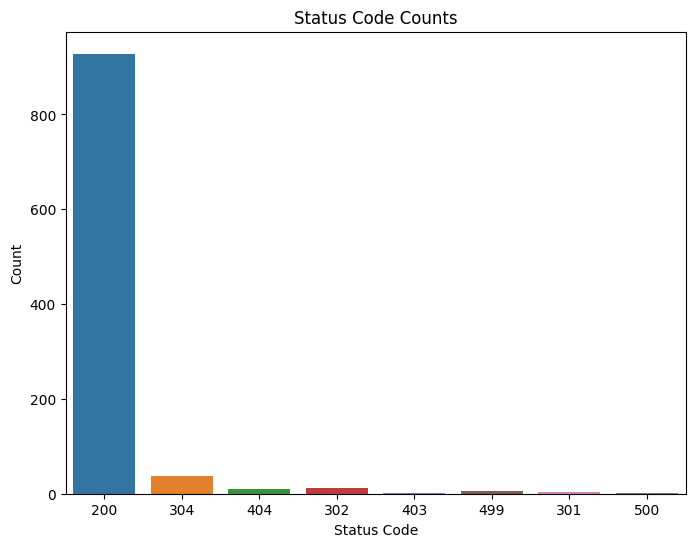

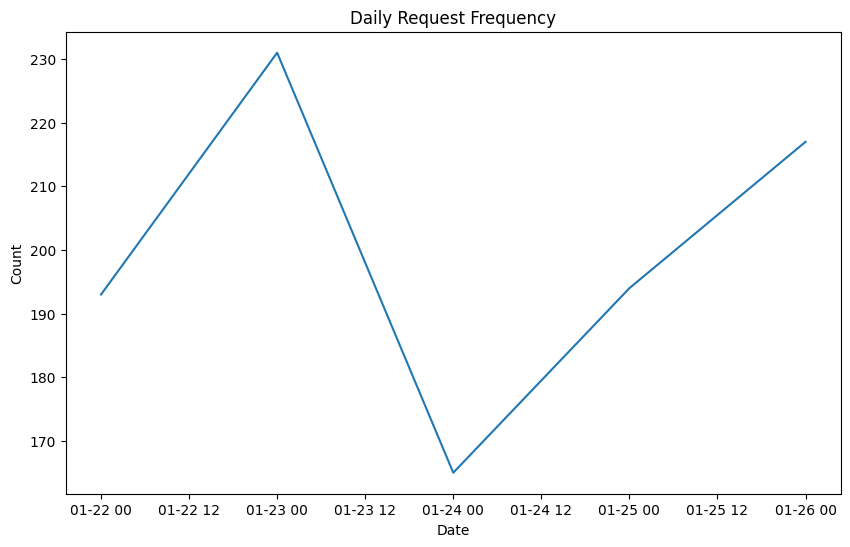

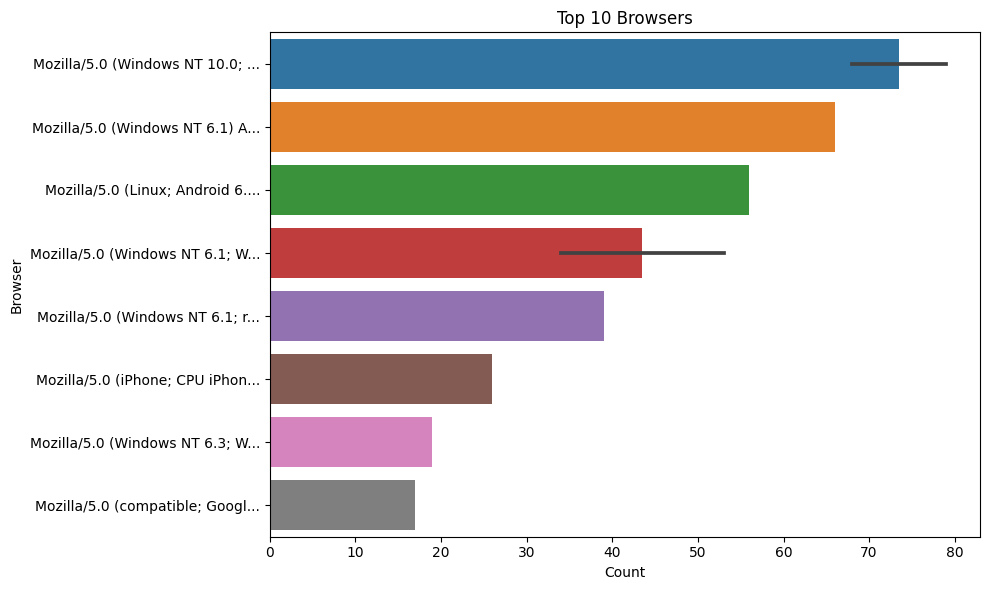

C:\Users\MD Arifuzzaman\AppData\Local\Temp\ipykernel_5840\2284526724.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size=8)


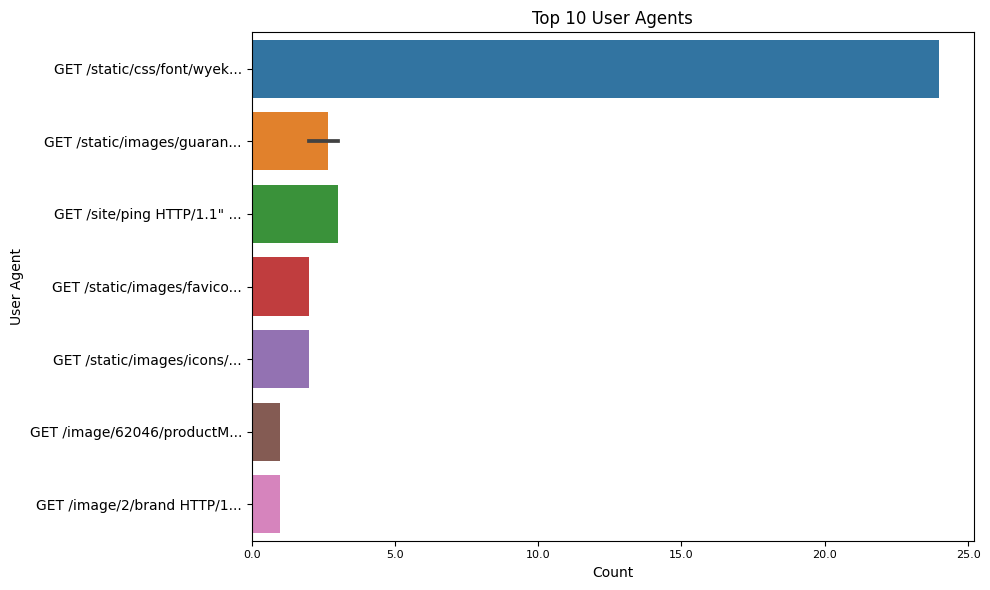

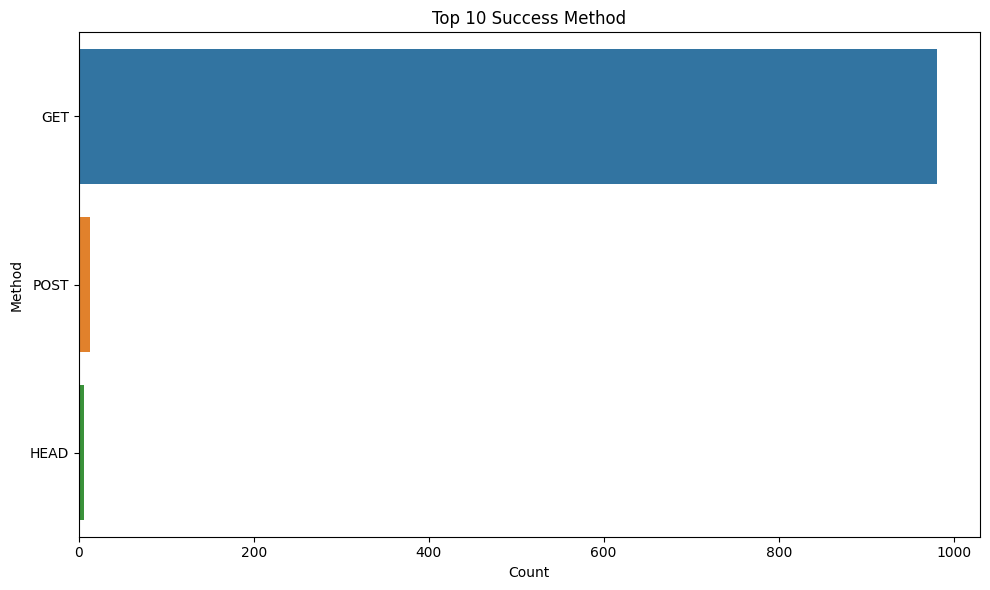

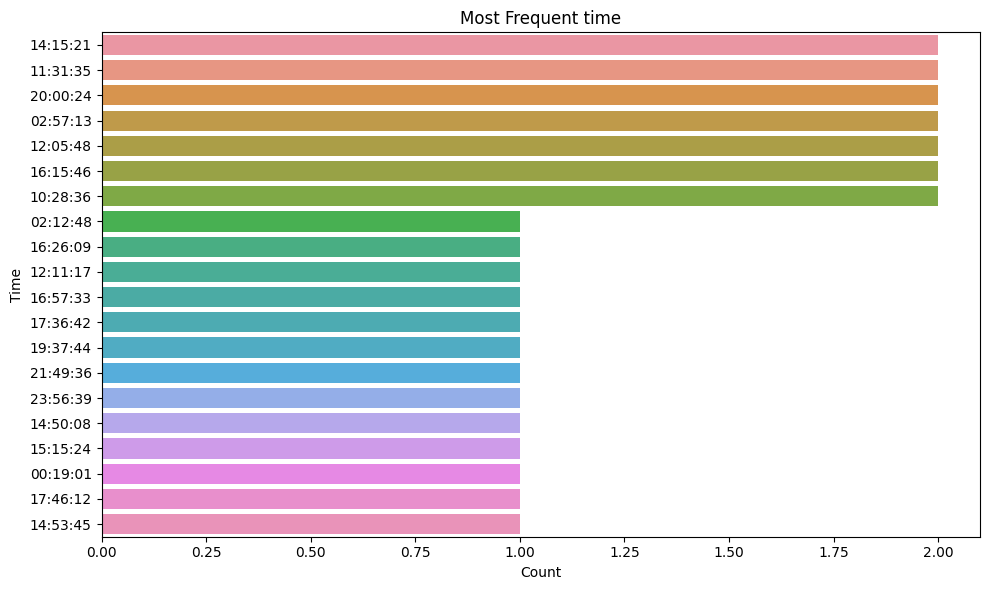

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Status Code Counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status Code')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.title('Status Code Counts')

# Plot 2: Daily Request Frequency
plt.figure(figsize=(10, 6))
df['Date'] = pd.to_datetime(df['Date'])
daily_counts = df['Date'].value_counts().sort_index()
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Request Frequency')

# Plot 3: Using Browser Frequency
# Extract the browser name from the user agent
df['Browser'] = df['value'].str.extract(r'"[^"]+"\s"([^"]+)"\s')
# Count the occurrences of each browser
browser_counts = df['Browser'].value_counts().head(10)
# shorter Browser text values
truncated_browsers = [browser[:30] + '...' if len(browser) > 20 else browser for browser in browser_counts.index]
plt.figure(figsize=(10, 6))
# Plot the bar chart with truncated Browser values
ax = sns.barplot(x=browser_counts.values, y=truncated_browsers)
plt.xlabel('Count')
plt.ylabel('Browser')
plt.title('Top 10 Browsers')
plt.tight_layout()
plt.show()

# Plot 4: User Agent Distribution
top_agents = df['User Agent'].value_counts().head(10)
# Truncate User Agent text values
truncated_agents = [agent[:25] + '...' if len(agent) > 25 else agent for agent in top_agents.index]
plt.figure(figsize=(10, 6))  # Increase the figure size
# Plot the bar chart
ax = sns.barplot(x=top_agents.values, y=truncated_agents)
# Adjust the font size of user agent values
ax.set_xticklabels(ax.get_xticks(), size=8)
plt.xlabel('Count')
plt.ylabel('User Agent')
plt.title('Top 10 User Agents')
# Adjust subplot spacing
plt.tight_layout()
# Display the plot
plt.show()

# Plot 5: User Method Distribution
top_agents = df['Method'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_agents.values, y=top_agents.index)
plt.xlabel('Count')
plt.ylabel('Method')
plt.title('Top 10 Success Method')
# Adjust subplot spacing
plt.tight_layout()
# Display the plots
plt.show()


# Plot 6: Most frequent browsing time
top_agents = df['Time'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_agents.values, y=top_agents.index)
plt.xlabel('Count')
plt.ylabel('Time')
plt.title('Most Frequent time')
# Adjust subplot spacing
plt.tight_layout()
# Display the plots
plt.show()



#Top Ten Error Endpoints


In [41]:
# Filter out status code 200
not200_df = df[df['Status Code'] != 200]

# Calculate the count of error endpoints
error_endpoints_freq_df = not200_df['User Agent'].value_counts().head(10).reset_index()
error_endpoints_freq_df.columns = ['User Agent', 'Count']

# Display the top ten error endpoints
print(error_endpoints_freq_df)


                                          User Agent  Count
0  GET /static/css/font/wyekan/font.woff HTTP/1.1...     24
1  GET /static/images/guarantees/warranty.png HTT...      3
2  GET /static/images/guarantees/bestPrice.png HT...      3
3                  GET /site/ping HTTP/1.1" 200 4 "-      3
4  GET /static/images/favicon.ico HTTP/1.1" 200 1...      2
5  GET /static/images/favicon.ico HTTP/1.1" 200 1...      2
6  GET /static/images/guarantees/fastDelivery.png...      2
7  GET /static/images/icons/btn-search.png HTTP/1...      2
8  GET /image/62046/productModel/100x100 HTTP/1.1...      1
9  GET /image/2/brand HTTP/1.1" 200 4842 "https:/...      1


In [42]:
# Convert 'Content Size' column to float
df['Content Size'] = pd.to_numeric(df['Content Size'], errors='coerce')

# Calculate the statistics using pandas DataFrame operations
statistics_df = pd.DataFrame(
    data={
        'min_content_size': df['Content Size'].min(),
        'max_content_size': df['Content Size'].max(),
        'mean_content_size': df['Content Size'].mean(),
        'std_content_size': df['Content Size'].std(),
        'count_content_size': df['Content Size'].count()
    },
    index=[0]  # Specify the index as a list with a single element
)

# Print the statistics
print(statistics_df)


   min_content_size  max_content_size  mean_content_size  std_content_size  \
0               0.0          570109.0       13535.074547      33123.974689   

   count_content_size  
0                 939  


In [43]:
# HTTP Status Code Analysis
status_freq_df = df.groupby('Status Code').size().sort_index().reset_index(name='Count')
print('Total distinct HTTP Status Codes:', status_freq_df['Status Code'].nunique())
print(status_freq_df)


Total distinct HTTP Status Codes: 8
  Status Code  Count
0         200    928
1         301      3
2         302     13
3         304     38
4         403      2
5         404     10
6         499      5
7         500      1


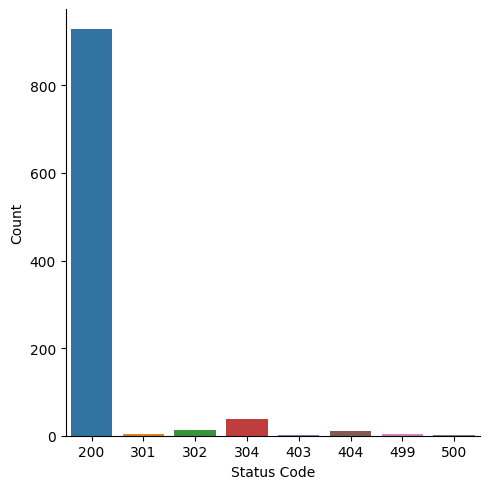

In [44]:
sns.catplot(x='Status Code', y='Count', data=status_freq_df, 
            kind='bar', order=status_freq_df['Status Code']) 

#The log_freq_df DataFrame stores the HTTP status codes along with their counts and logarithmic counts, allowing for a better understanding of the distribution and patterns of the status codes.

In [45]:
log_freq_df = status_freq_df.copy()
log_freq_df['log(Count)'] = np.log(log_freq_df['Count'])
log_freq_df = log_freq_df[['Status Code', 'Count', 'log(Count)']]
print(log_freq_df)


  Status Code  Count  log(Count)
0         200    928    6.833032
1         301      3    1.098612
2         302     13    2.564949
3         304     38    3.637586
4         403      2    0.693147
5         404     10    2.302585
6         499      5    1.609438
7         500      1    0.000000


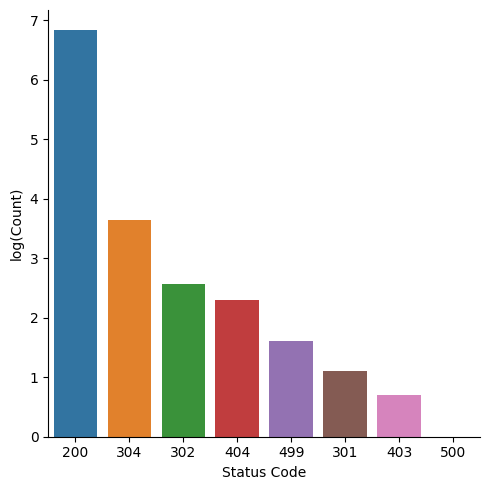

In [46]:
#plot HTTP status codes along with their counts and logarithmic counts
log_freq_pd_df = log_freq_df.sort_values(by=['log(Count)'], ascending=False)
sns.catplot(x='Status Code', y='log(Count)', data=log_freq_pd_df, kind='bar', order=log_freq_pd_df['Status Code'])


#The IP_sum_df DataFrame contains the top 100 IP addresses with the highest count of occurrences in the dataset. It provides insights into the IP addresses that generated the most traffic or requests in the analyzed log data

In [47]:
IP_sum_df = df['IP'].value_counts().sort_values(ascending=False).head(100)
print(IP_sum_df)


66.249.66.91       40
66.249.66.194      36
151.239.241.163    11
91.99.72.15         8
195.181.168.181     7
                   ..
185.137.110.29      1
151.241.43.180      1
188.118.111.54      1
217.218.220.229     1
5.233.169.15        1
Name: IP, Length: 100, dtype: int64


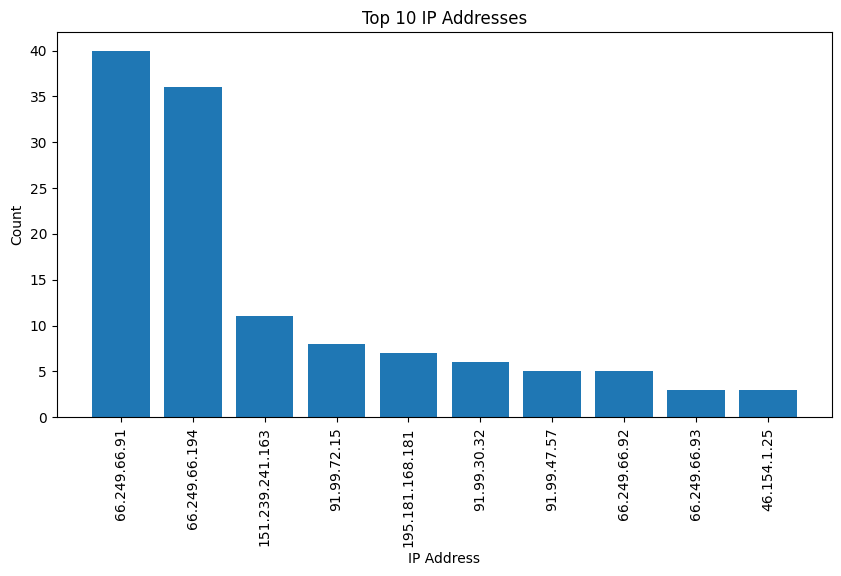

In [48]:
#IP_sum_df DataFrame visualization
sample_IP_df = IP_sum_df.head(10)

plt.figure(figsize=(10, 5))
plt.bar(sample_IP_df.index, sample_IP_df.values)
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('Top 10 IP Addresses')
plt.xticks(rotation='vertical')
plt.show()

calculates the frequency of each path in the dataset, selects the top 20 paths with the highest counts, and then displays the resulting dataframe.

In [49]:
# Count the occurrences of each path and select the top 20
paths_pd_df = df['Path'].value_counts().sort_values(ascending=False).sample(20).reset_index()
paths_pd_df.columns = ['Path', 'count']
print(paths_pd_df)


                                                 Path  count
0   /rapidGrails/jsonList?maxColumns=16&domainClas...      1
1               /static/images/third-party/footer.png      4
2                         /static/images/amp/blog.png      6
3                                     /image/50/brand      1
4   /rapidGrails/jsonList?maxColumns=16&domainClas...      1
5                 /orderAdministration/console/187315      1
6                                    /image/584/brand      1
7                   /image/61061/productModel/150x150      1
8                   /image/65164/productModel/150x150      1
9   /product/23584/49727/%D8%B4%D9%88%D9%85%DB%8C%...      1
10                /image/33953?name=a7mm.jpg&wh=50x50      1
11                                   /image/893/brand      1
12              /static/images/guarantees/support.png     10
13  /m/article/739/%D9%87%D9%85%D9%87-%DA%86%DB%8C...      1
14                                  /m/filter/b41,p56      1
15                  /ima

In [53]:
# Filter the dataframe to include only rows with non-200 status codes

not_200_df = df[df['Status Code'] != 200]

# Count the occurrences of each error endpoint path and select a random sample of 20
error_endpoints_freq_df = not_200_df['Path'].value_counts().sample(20).reset_index()
error_endpoints_freq_df.columns = ['Path', 'count']

# Display the dataframe showing the error endpoints and their respective counts
print(error_endpoints_freq_df)


                                                 Path  count
0                           /image/19/productTypeType      1
1                                 /m/filter/b584,b703      1
2                        /image/69/productType/120x90      1
3                   /image/61886/productModel/200x200      1
4                                                   /      4
5                         /image/1130/article/100x100      1
6                     /image/63043/productModel/50x50      1
7                   /image/32601/productModel/150x150      1
8          /static/images/zanbil/Information-Icon.png      1
9                   /image/61665/productModel/150x150      1
10  /m/product/26542/54290/%D9%85%D8%A7%D8%B4%DB%8...      1
11                  /image/61076/productModel/150x150      1
12                                   /image/216/brand      2
13                  /image/60128/productModel/150x150      1
14                         /static/images/checked.png      2
15                   /im

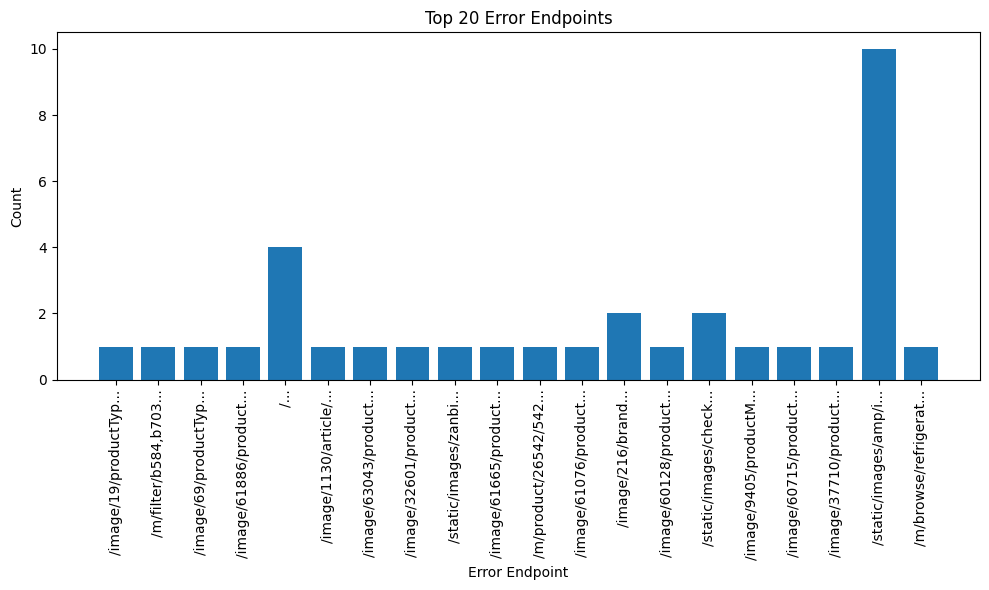

In [54]:
# shorter the paths to a certain length
max_path_length = 20
error_endpoints_freq_df['Truncated_Path'] = error_endpoints_freq_df['Path'].str[:max_path_length] + '...'

plt.figure(figsize=(10, 6))
plt.bar(error_endpoints_freq_df['Truncated_Path'], error_endpoints_freq_df['count'])
plt.xlabel('Error Endpoint')
plt.ylabel('Count')
plt.title('Top 20 Error Endpoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [55]:
# Calculate the count of unique hosts
unique_host_count = df['IP'].nunique()
print(unique_host_count)


866


calculates the count of unique hosts (IP addresses) using nunique(). Finally, the count of unique hosts per day is printed to the console. This analysis provides insights into the number of unique hosts observed each day.

In [56]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a copy of the DataFrame with 'IP' and 'Date' columns
host_day_pd_df = df[['IP', 'Date']].copy()

# Extract the day from the 'Date' column
host_day_pd_df['day'] = host_day_pd_df['Date'].dt.day

# Calculate the count of unique hosts per day
unique_daily_hosts = host_day_pd_df.groupby('Date')['IP'].nunique()

# Display the count of unique hosts per day
print(unique_daily_hosts)



Date
2019-01-22    176
2019-01-23    204
2019-01-24    146
2019-01-25    174
2019-01-26    193
Name: IP, dtype: int64


In [57]:
# Remove duplicate combinations of 'IP' and 'Date'
host_day_distinct_pd_df = host_day_pd_df.drop_duplicates()

# Display the first 10 sample rows of the distinct DataFrame
print(host_day_distinct_pd_df.sample(10))


                       IP       Date  day
8759428      86.55.138.26 2019-01-26   26
7704224     5.238.216.243 2019-01-25   25
7892284     5.213.127.164 2019-01-25   25
10268644  188.108.242.207 2019-01-26   26
1275923       37.27.96.17 2019-01-22   22
803284    151.239.207.126 2019-01-22   22
5709872   185.165.241.191 2019-01-24   24
7295115     80.250.203.42 2019-01-25   25
1004377   188.214.187.150 2019-01-22   22
6968993     113.203.87.61 2019-01-25   25


In [58]:
#count the number of unique IP addresses for each day
daily_hosts_df = host_day_distinct_pd_df.groupby('Date')['IP'].count().reset_index()
daily_hosts_df = daily_hosts_df.sort_values('Date')
print(daily_hosts_df)


        Date   IP
0 2019-01-22  176
1 2019-01-23  204
2 2019-01-24  146
3 2019-01-25  174
4 2019-01-26  193


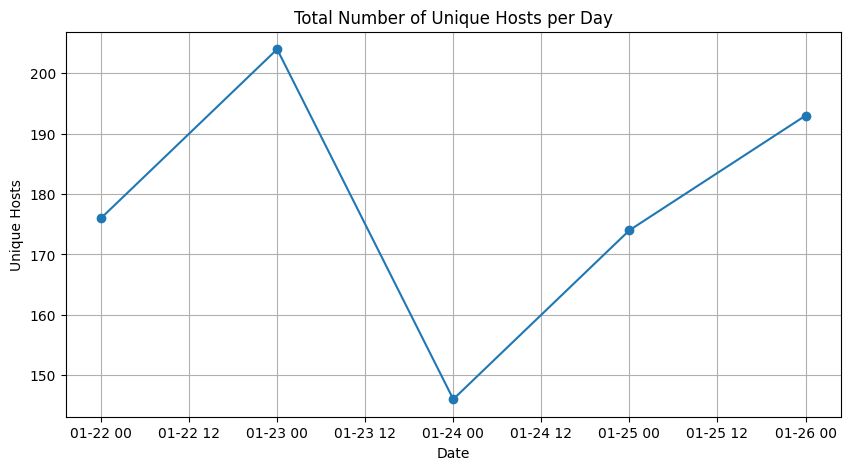

In [60]:
# Plotting the total number of unique hosts per day
plt.figure(figsize=(10, 5))
plt.plot(daily_hosts_df['Date'], daily_hosts_df['IP'], marker='o')
plt.xlabel('Date')
plt.ylabel('Unique Hosts')
plt.title('Total Number of Unique Hosts per Day')
plt.grid(True)
plt.show()


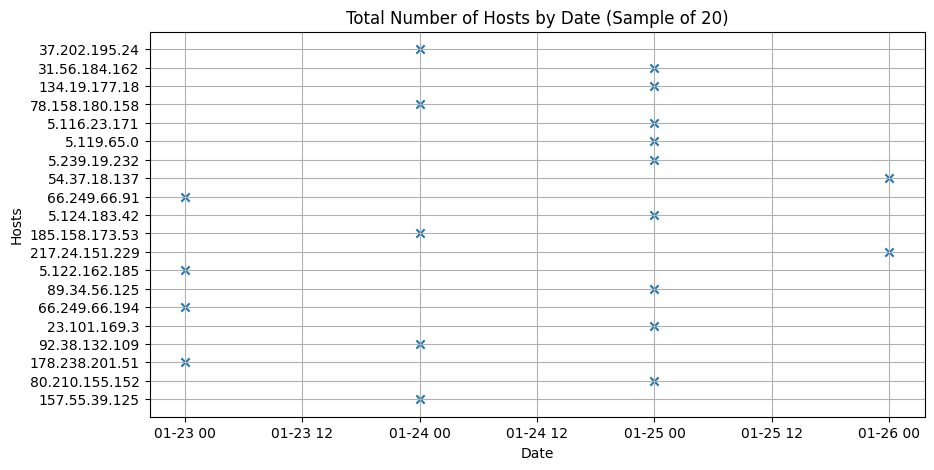

In [61]:
# Creating a sample DataFrame

sample_df = df.sample(20)

# Plotting the scatter plot of total number of hosts by date

plt.figure(figsize=(10, 5))
plt.scatter(sample_df['Date'], sample_df['IP'], marker='x')
plt.xlabel('Date')
plt.ylabel('Hosts')
plt.title('Total Number of Hosts by Date (Sample of 20)')
plt.grid(True)
plt.show()


In [68]:
#Average Number of Daily Requests per Host

df['Time'] = pd.to_datetime(df['Date']) 

daily_hosts_pd_df = host_day_distinct_pd_df.groupby('Date').size().reset_index(name='total_hosts')

total_daily_requests_pd_df = df['Date'].dt.day.value_counts().reset_index()
total_daily_requests_pd_df.columns = ['day', 'total_reqs']

avg_daily_requests_per_host_pd_df = pd.merge(total_daily_requests_pd_df, daily_hosts_pd_df, on='Day')
avg_daily_requests_per_host_pd_df['avg_reqs'] = avg_daily_requests_per_host_pd_df['total_reqs'] / avg_daily_requests_per_host_pd_df['total_hosts']
avg_daily_requests_per_host_pd_df = avg_daily_requests_per_host_pd_df.sort_values('day')

avg_daily_requests_per_host_pd_df


KeyError: 'Day'

In [74]:
import pandas as pd

# Calculate the total number of unique hosts per day
daily_hosts_df = host_day_distinct_pd_df.groupby('day').size().reset_index(name='total_hosts')

# Calculate the total number of requests per day
total_daily_requests_df = df['Date'].dt.day.rename('day').value_counts().reset_index()
total_daily_requests_df.columns = ['day', 'total_reqs']

# Join the two dataframes and calculate the average requests per host
avg_daily_requests_per_host_df = pd.merge(total_daily_requests_df, daily_hosts_df, on='day')
avg_daily_requests_per_host_df['avg_reqs'] = avg_daily_requests_per_host_df['total_reqs'] / avg_daily_requests_per_host_df['total_hosts']
avg_daily_requests_per_host_df = avg_daily_requests_per_host_df.sort_values('day')

# Display the resulting dataframe
print(avg_daily_requests_per_host_df)



   day  total_reqs  total_hosts  avg_reqs
3   22         193          176  1.096591
0   23         231          204  1.132353
4   24         165          146  1.130137
2   25         194          174  1.114943
1   26         217          193  1.124352


Generate a point plot illustrating the average daily requests per host, allowing you to observe trends and variations in the data.

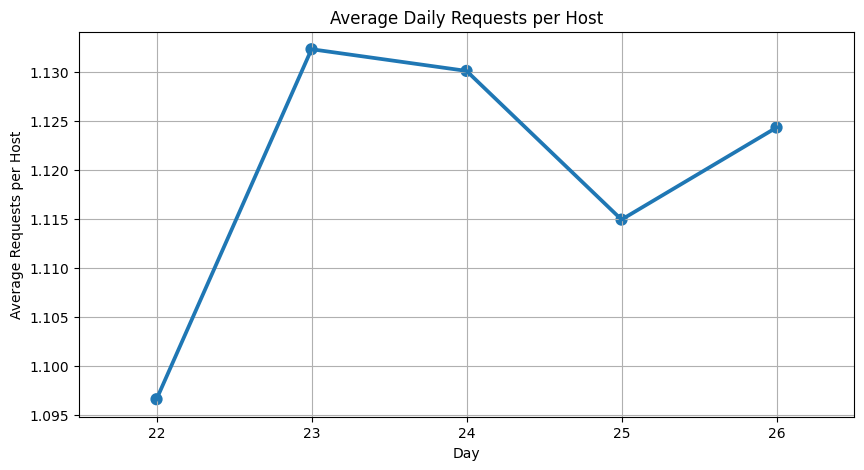

In [76]:

plt.figure(figsize=(10, 5))
sns.pointplot(data=avg_daily_requests_per_host_df, x='day', y='avg_reqs')
plt.xlabel('Day')
plt.ylabel('Average Requests per Host')
plt.title('Average Daily Requests per Host')
plt.grid(True)
plt.show()


In [77]:
#Counting 404 Response Codes

not_found_count = len(df[df['Status Code'] == 404])
print(f"Total 404 responses: {not_found_count}")


Total 404 responses: 0


In [81]:
#Top Twenty 404 Response Code Endpoints

endpoints_404_count_df = df[df['Status Code'] == 404]['Path'].value_counts().head(100).reset_index()
endpoints_404_count_df.columns = ['Path', 'count']
print(endpoints_404_count_df)


Empty DataFrame
Columns: [Path, count]
Index: []


In [90]:
#Top Twenty 404 Response Code Hosts

IP_404_count_df = df[df['Status Code'] == 404]['IP'].value_counts().head(20).reset_index()
IP_404_count_df.columns = ['IP', 'count']
print(IP_404_count_df)



Empty DataFrame
Columns: [IP, count]
Index: []


In [83]:
#Visualizing 404 Errors per Day

day_404_count_df = df[df['Status Code'] == 404]['Date'].value_counts().head(20).reset_index()
day_404_count_df.columns = ['Date', 'count']
print(day_404_count_df)


Empty DataFrame
Columns: [Date, count]
Index: []


In [91]:
# visualize the total 404 errors per day now

if not day_404_count_df.empty:
    c = sns.catplot(x='Date', y='count', data=day_404_count_df, kind='point', height=5, aspect=1.5)
else:
    print("No data available for plotting.")


No data available for plotting.


In [85]:
#Top Three Days for 404 Errors

day_404_count_df = day_404_count_df
top_three_days_404_df = day_404_count_df.sort_values(by='count', ascending=False).head(3)
print(top_three_days_404_df)


Empty DataFrame
Columns: [Date, count]
Index: []


In [86]:
# Calculate the count of 404 errors per hour
hourly_errors_count = df[df['Status Code'] == 404]['Time'].value_counts().reset_index()
hourly_errors_count.columns = ['Time', 'Count']

# Sort the count in descending order and select the top three hours
top_three_hours_404_df = hourly_errors_count.head(3)

if not top_three_hours_404_df.empty:
    # Plot the hourly distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Time', y='Count', data=top_three_hours_404_df, color='steelblue')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title('Top Three Hours for 404 Errors')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available for plotting.")



No data available for plotting.


<Figure size 1200x800 with 0 Axes>

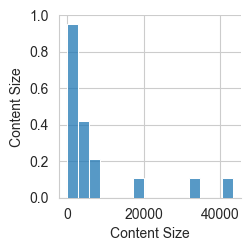

In [105]:
subset_columns = ['Content Size']
subset_df = df[subset_columns].copy()

# Take a sample of 20 rows if available, otherwise use all the rows
sample_size = min(20, num_rows)
subset_df_sample = subset_df.sample(n=sample_size, random_state=1)

# Adjust figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create a pair plot
sns.pairplot(subset_df_sample)
plt.show()


In [106]:
# Identify the variables and their types
variable_types = df.dtypes

# Print the variable types
print(variable_types)

value                   object
IP                      object
Timestamp               object
Date            datetime64[ns]
Time            datetime64[ns]
Browser                 object
Method                  object
Path                    object
Protocol                object
Status Code             object
User Agent              object
Content Size           float64
dtype: object


In [107]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the columns with missing values and their corresponding counts
print(missing_values)

value            0
IP               0
Timestamp        0
Date             0
Time             0
Browser          0
Method           0
Path             0
Protocol         0
Status Code      0
User Agent       2
Content Size    61
dtype: int64


In [108]:
# Convert 'Content Size' column to numeric
df['Content Size'] = pd.to_numeric(df['Content Size'], errors='coerce')

# Fill missing values in the 'User Agent' column with a specified value or method
df['User Agent'].fillna('Unknown', inplace=True)

# Fill missing values in the 'Content Size' column with the mean of non-missing values
df['Content Size'].fillna(df['Content Size'].mean(), inplace=True)

# Verify the changes
print(df.isnull().sum())  # Check if there are any remaining missing values


value           0
IP              0
Timestamp       0
Date            0
Time            0
Browser         0
Method          0
Path            0
Protocol        0
Status Code     0
User Agent      0
Content Size    0
dtype: int64


In [109]:
# Filter requests made by Bingbot and Googlebot
bingbot_requests = df[df['User Agent'].str.contains('bingbot', case=False)]
googlebot_requests = df[df['User Agent'].str.contains('googlebot', case=False)]

# Step 2: Data Analysis
bingbot_avg_content_size = bingbot_requests['Content Size'].mean()
googlebot_avg_content_size = googlebot_requests['Content Size'].mean()

# Step 3: Hypothesis Testing
t_stat, p_value = ttest_ind(bingbot_requests['Content Size'], googlebot_requests['Content Size'], equal_var=False)

# Step 4: Interpretation and Conclusion
alpha = 0.05  # Set the significance level
if p_value < alpha:
    conclusion = "There is a significant difference in the average content size between Bingbot and Googlebot requests."
else:
    conclusion = "There is no significant difference in the average content size between Bingbot and Googlebot requests."

# Communication
print("Bingbot Average Content Size:", bingbot_avg_content_size)
print("Googlebot Average Content Size:", googlebot_avg_content_size)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print(conclusion)

Bingbot Average Content Size: 24982.01242456514
Googlebot Average Content Size: 19948.25987538712
T-statistic: 1.0740358792301694
P-value: 0.30373806453567476
There is no significant difference in the average content size between Bingbot and Googlebot requests.


Null Hypothesis (H0): There is no significant difference in the average content size between Bingbot and Googlebot requests.

Alternative Hypothesis (Ha): There is a significant difference in the average content size between Bingbot and Googlebot requests.

The goal of the hypothesis testing is to gather evidence from the data to either support or reject the null hypothesis in favor of the alternative hypothesis.

The statistical test used in this case is the independent samples t-test, which compares the means of two independent groups (Bingbot requests and Googlebot requests). The t-statistic is calculated based on the difference between the sample means and their standard errors. The p-value represents the probability of obtaining the observed difference (or a more extreme difference) if the null hypothesis is true.

The ttest_ind() function is used to calculate the t-statistic and p-value for comparing the average content size between Bingbot and Googlebot requests. The equal_var=False argument is used to indicate that the variances of the two groups are not assumed to be equal.

Based on the p-value and the predetermined significance level (alpha), we can make a conclusion. If the p-value is less than alpha (0.05 in this case), it suggests that the observed difference is statistically significant, and we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, if the p-value is greater than or equal to alpha, we fail to reject the null hypothesis.

result: 
There is no significant difference in the average content size between Bingbot and Googlebot requests.

